# <center> 👉 class_06_4 IP » _Contours - Contour Bound Fit, Convexhull, Match Shape, Moment_ </center>

## What are contours?  

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity.   
So the contours are a useful tool for shape analysis and object detection and recognition.  

Finding contours is like finding white object from black background,   
- so remember, the object to be found should be white and background should be black.   
- Thus, for better accuracy, we should use binary images and before finding contours, apply thresholding as we discussed in the last section.

In OpenCV, we use two functions,   
- one to find contours : **findContours()**   
- and other to draw contours : **drawCounter()**   

컨투어(contour)는 등고선을 의미합니다. 등고선은 지형의 높이가 같은 영역을 하나의 선으로 표시한 것입니다. 영상에서 컨투어를 그리면 모양을 쉽게 인식할 수 있습니다. OpenCV에서 제공하는 컨투어 함수는 다음과 같습니다.
컨투어(contour)란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선 정보입니다.  
물체의 윤곽선, 외형을 파악하는데 유용하게 사용됩니다.  

OpenCV의 findContours 함수로 이미지의 컨투어 정보, 컨투어의 상하구조(hierachy) 정보를 출력합니다.  

~ Syntax:.

>**image, contours, hierarchy=cv.findContours(img, mode, method, (contours), (hierarchy), (offset))**

~ Parameters:  
    
* img: binary img
* mode: Contour retrieval mode:  
>- cv2.RETR_EXTERNAL: 컨투어 라인 중 가장 바깥쪽 라인만 생성, 모든 외곽 윤곽선만 검출하며, 계층 구조를 구성하지 않습니다. 
>- cv2.RETR_LIST: 모든 컨투어 라인을 검출하며, 상하구조(hierachy)관계를 구성하지 않음 
>- cv2.RET_CCOMP: 모든 컨투어 라인을 검출하며, 상하구조는 2 단계로 구성함 
>- cv2.RETR_TREE: 모든 컨투어 라인을 검출하며, 모든 상하구조를 구성함 (Tree 구조)

* method:Contour approximation method: 컨투어를 찾을 때 사용하는 근사화 방법   
>- cv2.CHAIN_APPROX_NONE: 모든 컨투어 포인트를 반환, 근사 없이 모든 좌표 제공  
>- cv2.CHAIN_APPROX_SIMPLE: 컨투어 라인을 그릴 수 있는 포인트만 반환, 컨투어 꼭짓점 좌표만 제공 수평, 수직 및 대각선 요소를 압축하고 끝점만 남겨 둡니다    
>- cv2.CHAIN_APPROX_TC89_L1: Teh-Chin 연결 근사 알고리즘 L1 버전을 적용하여 컨투어 포인트를 줄임. 좌표 개수 축소 프리먼 체인 코드에서의 윤곽선으로 적용  
>- cv2.CHAIN_APPROX_TC89_KCOS: Teh-Chin 연결 근사 알고리즘 KCOS 버전을 적용하여 컨투어 포인트를 줄임. 좌표 개수 축소 프리먼 체인 코드에서의 윤곽선으로 적용   
    
* contours(optional): 검출한 컨투어 좌표 (list type)
* hierarchy(optional): 컨투어 계층 정보 (Next, Prev, FirstChild, Parent, -1 [해당 없음])
* offset(optional): Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context. ROI 등으로 인해 이동한 컨투어 좌표의 오프셋 

This function returns three objects:

- Img:The input image in which we have to find contours
- Contours: It contains detected contours and  contour is stored as a vector of points
- Hierarchy:Optional output vector, containing information about the image topology.   
>- It has as many elements as the number of contours. For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively.   
>- If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.

contours is a Python list of all the contours in the image.   
Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.  

## ▶ Find Contour  

Let's see how to find contours of a binary image:

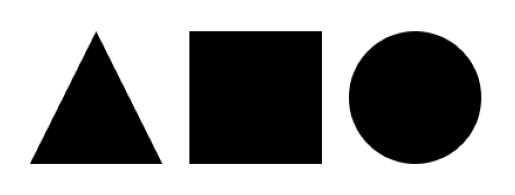

In [1]:
# cntr_find.py  py=3.7

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/shapes.png')
plt.imshow(img),plt.axis('off')
plt.show()

No of shapes contour1 (contour2) : 3(3)


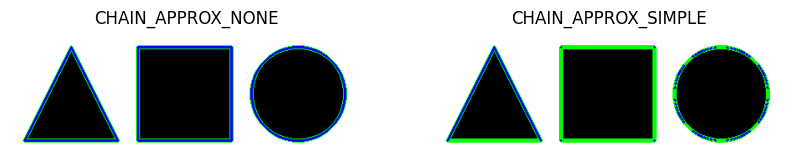

In [2]:
img2 = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV) # BINARY_INV img
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Return all coordinates for the outermost contour ---③  
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Returns only vertex coordinates for the outermost contour

print('No of shapes contour1 (contour2) : %d(%d)'% (len(contour), len(contour2))) # no of contours

cv2.drawContours(img, contour, -1, (0,255,0), 4) # draw contour
cv2.drawContours(img2, contour2, -1, (0,255,0), 4) # draw vertex contour

for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1) # blue circle on contour coord

for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1) 

cv2.imshow('CHAIN_APPROX_NONE', img)
cv2.imshow('CHAIN_APPROX_SIMPLE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('CHAIN_APPROX_NONE')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('CHAIN_APPROX_SIMPLE')
plt.show()

- On the left, contours were drawn at all coordinates using cv2.CHAIN_APPROX_NONE.
- On the right, only vertices are displayed using cv2.CHAIN_APPROX_SIMPLE.  

- 왼쪽은 cv2.CHAIN_APPROX_NONE을 사용해서 모든 좌표에 컨투어를 그렸습니다.   
- 오른쪽은 cv2.CHAIN_APPROX_SIMPLE을 사용해서 꼭짓점만 표시

### ■ Contour Approximation Method  

This is the third argument in cv.findContours function. What does it denote actually?  
Above, we told that contours are the boundaries of a shape with same intensity.   
It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ?   
That is specified by this contour approximation method.
- If you pass **cv.CHAIN_APPROX_NONE**, all the boundary points are stored.  
- But actually do we need all the points? For eg, you found the contour of a straight line.   
- Do you need all the points on the line to represent that line? No, we need just two end points of that line.   
- This is what **cv.CHAIN_APPROX_SIMPLE** does. It removes all redundant points and compresses the contour, thereby saving memory.

Above image of a rectangle demonstrate this technique.   
Just draw a circle on all the coordinates in the contour array (drawn in blue color).   
- First image shows points I got with cv.CHAIN_APPROX_NONE (734 points) and 
- second image shows the one with cv.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!!

## ▶ Contour Hierachy  

In the output, we got three arrays, 
- first is the image, 
- second is our contours, and 
- one more output which we named as **hierarchy**  

### What is Hierarchy?  

Normally we use the cv.findContours() function to detect objects in an image, right ?   
Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes.   
Just like nested figures. In this case, we call outer one as **parent** and inner one as **child**.   
This way, contours in an image has some relationship to each other.   
And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc.   
Representation of this relationship is called the Hierarchy.

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


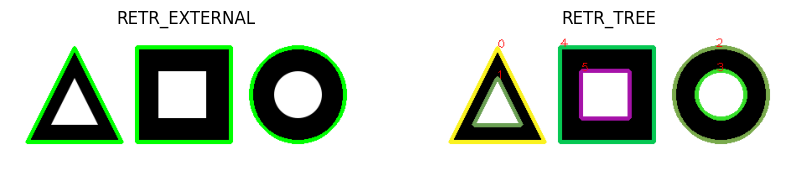

In [3]:
# cntr_hierachy.py
import cv2
import numpy as np

img = cv2.imread('./images/practice_img/shapes_donut.png')
img2 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contour), hierarchy)     # No of contours and hierarchy

contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contour2), hierarchy) 

cv2.drawContours(img, contour, -1, (0,255,0), 3) # draw the outest contour line

for idx, cont in enumerate(contour2): # draw tall contour lines
    color = [int(i) for i in np.random.randint(0,255, 3)] 
    cv2.drawContours(img2, contour2, idx, color, 3) 
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255)) # show indx no

cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('RETR_EXTERNAL')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('RETR_TREE')
plt.show()

- When passing cv2.RETR_EXTERNAL as a parameter, the contour is drawn only on the outer part of the picture.
- But when you pass cv2.RETR_TREE, it draws contours on all boundaries. This is called a **tree hierarchy contour**.

    - 파라미터로 cv2.RETR_EXTERNAL을 전달할때는 그림의 외곽 부분에만 컨투어를 그립니다.   
    - 하지만 cv2.RETR_TREE를 전달할 때는 모든 경계에 컨투어를 그립니다. 이를 트리 계층 컨투어라고 합니다.   

<img src='./images/practice_img/contour_hrchy.png' width=400 height=300>

Let's take a look at the output above.
- When the cv2.findContours() function is called, not only the contour coordinates but also the hierarchy are output.  
- cv2.findContours() 함수를 호출하면 컨투어 좌표뿐만 아니라 hierarchy를 출력합니다.   

Below is contour2, i.e. the hierarchy corresponding to the right result (tree hierarchy contour) in the output picture above.  
- 아래는 contour2, 즉 위 출력 그림에서 오른쪽 결과(트리 계층 컨투어)에 해당하는 hierarchy입니다.

|인덱스|다음(Next)|이전(Prev)|자식(First Child)|부모(Parent)
|-------|----------|---------|-----------|---------
0|2|-1|1|-1|
1|-1|-1|-1|0
2|4|0|3|-1|
3|-1|-1|-1|2
4|-1|2|5|-1|
5|-1|-1|-1|4  

- -1 of the element value indicates that it is meaningless. (요소 값 중 -1은 의미 없음을 나타냄)   

First, let's look at line 0. The 0th row refers to the contour of the first shape.  
- 우선, 0번째 행을 보겠습니다. 0번째 행은 첫 번째 도형의 컨투어를 의미합니다.  
>- This is the outer circle of the triangle on the left in the second picture above
>- 이는 위 두 번째 그림에서 왼쪽의 삼각형 외곽을 뜻합니다. 
- Next, Prev, First Child, and Parent in the 0th row are 2, -1, 1, and -1, respectively  
- 0번째 행의 Next, Prev, First Child, Parent는 각각 2, -1, 1, -1입니다.  
>- Prev and Parent are -1, which means they don't mean anything. (Prev와 Parent는 -1이므로 아무 의미가 없다는 뜻임)   
>- This means that the criterion for a triangle outer contour has no previous shape, and there is no parent shape.
>- 즉, 삼각형 외곽 컨투어의 기준에는 이전 도형이 없고, 부모 도형도 없다는 뜻입니다.   
>- However, Next and First Child are 2 and 1, respectively. This means that the next shape is line 2, and the child is line 1.  
>- 그러나 Next와 First Child는 각 2와 1입니다. 이 말은 다음 도형은 2행이고, 자식은 1행이라는 것입니다.   

- The contour in the 2nd row, 4, 0, 3 -1, is the outskirts of the far right circle.  
- 2행인 4, 0 ,3 -1을 이루고 있는 컨투어는 맨 오른쪽 원 도형의 외곽입니다.   
- Row 1, -1, -1, -1, 0 is the inner contour of the left triangle  
- 1행인 -1, -1, -1, 0은 왼쪽 삼각형의 내부 컨투어입니다.   
- Naturally, the parent of the inner triangle is 0 (자연스럽게 내부 삼각형의 부모는 0입니다)   

- The next figure of the contour with 2 rows 4, 0 and 3 -1 is the outer of the rectangle in row 4, the previous is the outer triangle of row 0, and the child is inside the circle in row 3.   
- 2행인 4, 0 ,3 -1을 이루고 있는 컨투어의 다음 도형은 4행인 사각형 외곽이고, 이전은 0행인 삼각형 외곽이며, 자식은 3행인 원 내부입니다.   
- If you look at the contour hierarchy in this way, you can traverse the outlying elements and the child elements.
- 이런 식으로 컨투어 계층 정보(hierarchy)를 보면 외곽 요소와 자식 요소를 순회할 수 있습니다.   
If you want to pick only the outermost contours, you only need to find the row with a parent of -1, which is the same as the number of shapes in this example.  
- 최외곽 컨투어만 골라내려면 부모 항목이 -1인 행만 찾으면 되고, 그것이 이 예제에서는 도형의 개수와 같습니다.  

## ▶ drawContours(): 

Syntax:    

>**cv.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)**  

Parameters:

- Image: Input image.
- contours: All the input contours. Each contour is stored as a point vector.
- contourIdx: Parameter indicating a contour to draw. If it is negative (-1), all the contours are drawn.
- color: Color of the contours.
- thickness: Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
- lineType: Line connectivity. See LineTypes
- hierarchy: Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
- maxLevel: Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.
- offset: Optional contour shift parameter. Shift all the drawn contours by the specified offset=(dx,dy).
    
|<center>Contour Processing</center>|<center>Function Syntax</center>|
|:----------------------|:------------------:|
| To draw all the contours in an image|cv.drawContours(img, contours, -1, (0,255,0), 3)|
| To draw an individual contour, say 4th contour|cv.drawContours(img, contours, 3, (0,255,0), 3)|
| But most of the time, this method will be useful| cnt = contours[4] cv.drawContours(img, [cnt], 0, (0,255,0), 3)|  

✓ Note
Last two methods are same, but when you go forward, you will see last one is more useful.    
Example:

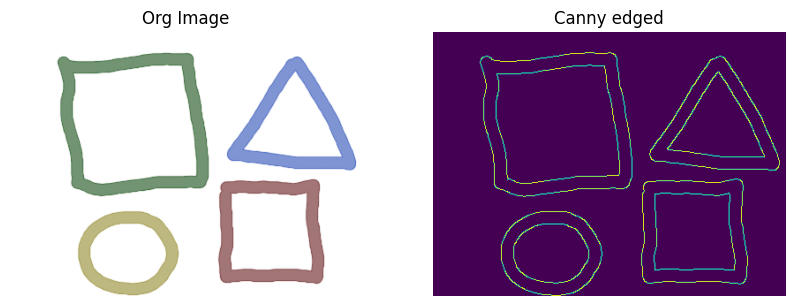

In [4]:
import cv2 
import numpy as np 
  
image_org = cv2.imread('./images/opencv_sample/pic3.png',1) 
# Find Canny edges 
edged = cv2.Canny(image_org, 30, 200) 

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(image_org), axs[0].axis('off'), axs[0].set_title('Org Image')
axs[1].imshow(edged), axs[1].axis('off'), axs[1].set_title('Canny edged')
plt.imshow(image_org)
plt.imshow(edged)
plt.show()

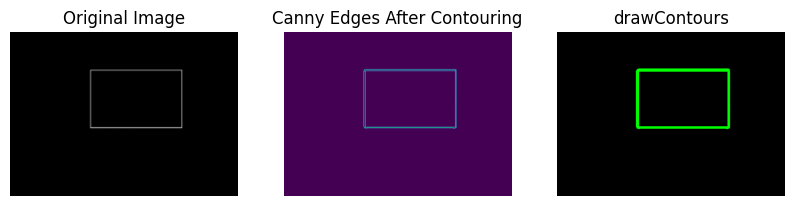

In [5]:
image = cv2.imread('./images/pic_rect.png',1) 
# Find Canny edges 
edged = cv2.Canny(image, 30, 200) 
# Finding Contours Use a copy of the image e.g. edged.copy() since findContours alters the image 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(image), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(edged), axs[1].axis('off'), axs[1].set_title('Canny Edges After Contouring')
# image_con = cv2.drawContours(image_org, contours, -1, (0, 255, 0), 3) 

axs[2].imshow(cv2.drawContours(image, contours, -1, (0, 255, 0), 3)), axs[2].axis('off'), axs[2].set_title('drawContours')

plt.imshow(image_org),plt.imshow(edged),plt.imshow(cv2.drawContours(image, contours, -1, (0, 255, 0), 3))

plt.show()

## ▶ Bounding Fit (컨투어를 감싸는 도형 그리기)  

You can also draw shapes that wrap around the contour. 

* x, y, w, h = cv2.boundingRect(contour): Return a rectangle that wraps around coordinates
>- x, y: left top of rectangle
>- w, h: width and height
* rotateRect = cv2.minAreaRect(contour): Calculate the minimum rectangle surrounding the coordinates
* vertex = cv2.boxPoints(rotateRect): Calculate vertex coordinates from rotateRect
>- vertex: 4 vertex coordinates(need to change to integer)
* center, radius = cv2.minEnclosingCircle(contour): Compute minimal circle surrounding coordinates
>- center: center(x, y)
>- radius: radius
* area, triangle = cv2.minEnclosingTriangle(points): Minimum triangle calculation surrounding coordinates
>- area: area
>- triangle: 3 vertex coordinates
* ellipse = cv2.fitEllipse(points): Compute minimal ellipse surrounding coordinates
* line = cv2.fitLine(points, distType, param, reps, aeps, line): Calculate a straight line passing through a center point
>- distType: Distance calculation method (cv2.DIST_L2, cv2.DIST_L1, cv2.DIST_L12, cv2.DIST_FAIR, cv2.DIST_WELSCH, cv2.DIST_HUBER)
>- param: distType param 0 = Select optimal value
>- reps: radius accuracy, 0.01
>- aeps: angle accuracy, 0.01
>- line(optional): vx, vy normalized unit vector, x0, y0: center coor


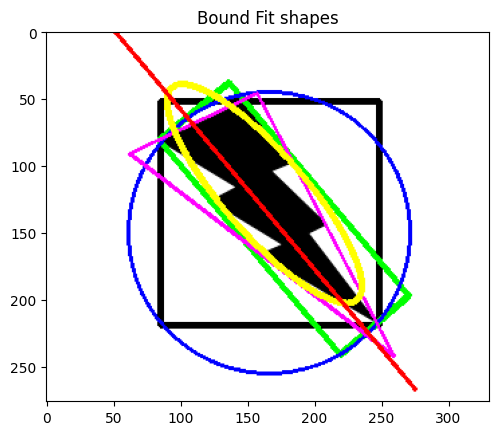

In [11]:
# cntr_bound_fit.py
import cv2
import numpy as np

img = cv2.imread("./images/practice_img/lightning.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # find contours
contr = contours[0]

x,y,w,h = cv2.boundingRect(contr)  # bounding fit rectangle
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 4 vertex coordinates of center and angle
box = np.int0(box)         
cv2.drawContours(img, [box], -1, (0,255,0), 3)

(x,y), radius = cv2.minEnclosingCircle(contr)  # bounding fit circle
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

ret, tri = cv2.minEnclosingTriangle(contr)   # bounding fit triangle
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

ellipse = cv2.fitEllipse(contr)     # bounding fit ellipse
cv2.ellipse(img, ellipse, (0,255,255), 3)

[vx,vy,x,y] = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)  # draw line
cols,rows = img.shape[:2]
cv2.line(img,(0, int(0-x*(vy/vx) + y)), (cols-1, int((cols-x)*(vy/vx) + y)), (0,0,255), 2)

cv2.imshow('Bound Fit shapes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

# fig, axs = plt.subplots(1,2,figsize=(10,10))
# axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('Bound Fit shapes')
# axs[1].imshow(img2), axs[1].axis('off'), axs[1].set_title('approx')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Bound Fit shapes')
plt.show()

## ▶ Contour Approximation (컨투어 추정/단순화)   

The contour function we have looked at so far provides the ability to draw a picture along the outline of the image.
However, most images we get in real life contain some noise.
Therefore, it is not advisable to draw the contour too accurately.
In fact, there are times when drawing something slightly simplified is more useful than drawing it accurately.

Contour Approximation is used to draw a line that approximates the actual contour line by reducing the number of contour points using the Douglas-Peucker algorithm.  

In OpenCV, it is implemented as a function called approxPolyDP.  

    지금까지 살펴본 컨투어 함수는 이미지 외곽을 따라 그림을 그려주는 기능을 제공했습니다.   
    하지만 실생활에서 얻는 대부분의 이미지는 약간의 노이즈가 포함되어 있습니다.   
    그래서 컨투어를 너무 정확히 그리는 것도 바람직하지 않습니다.   
    오히려 약간 단순화해 그리는 게 정확하게 그리는 것보다 더 쓸모 있는 경우가 있습니다.   
    컨투어 추정은 Douglas-Peucker 알고리즘을 이용해 컨투어 포인트의 수를 줄여 실제 컨투어 라인과 근사한 라인을 그릴 때 사용합니다.  

    OpenCV에서는 approxPolyDP 라는 함수로 구현되어 있다.   

* **approx = cv2.approxPolyDP(contour, epsilon, closed)**  

>- contour: Contour coordinates
>- epsilon: Approximate value accuracy, error range
>- closed: contour closed (boolean)

The following code sets the maximum distance between the actual contour line and the approximation to 0.01 and 0.05 and compares it with the actual contour line.  

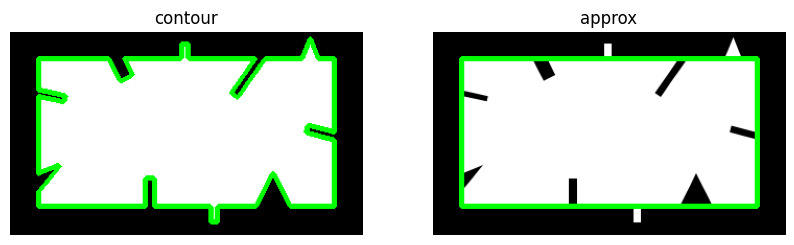

In [13]:
# cntr_approximate.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/bad_rect.png')
img2 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
epsilon = 0.05 * cv2.arcLength(contour, True) 
approx = cv2.approxPolyDP(contour, epsilon, True)

cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

cv2.imshow('contour', img)
cv2.imshow('approx', img2)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('contour')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('approx')
plt.show()

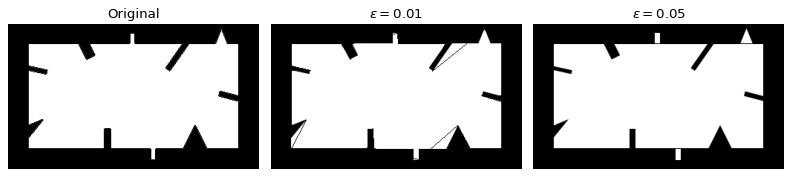

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img_new = cv2.imread('./images/practice_img/bad_rect.png')

img1 = img_new.copy().astype('uint8')
img2 = img_new.copy().astype('uint8')
img3 = img_new.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1_cntr = cv2.drawContours(img1, [c0], -1, 7)  #
image2_apx1 = cv2.drawContours(img2, [approx1], -1, 7)
image2_apx2 = cv2.drawContours(img3, [approx2], -1, 7)

titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1_cntr, image2_apx1, image2_apx2]
figure(figsize=(10, 10), dpi=80)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()    

If you use the cv2.approxPolyDP() function, it calculates the contour while ignoring uneven areas as shown on the right.  
cv2.approxPolyDP() 함수를 활용하면 오른쪽과 같이 요철이 있는 부분은 무시하고 컨투어를 계산해줍니다. 

## ▶ Contour Convexhull  

Another form of simplifying the contour is to create a convex hull.
- A convex hull refers to a shape in which no part is concave.
- Therefore, a convex hull is useful for finding an outer region that completely encompasses the object.  

    컨투어를 단순화하는 또 다른 형태는 볼록 선체(convex hull)를 만드는 것입니다.   
    볼록 선체란 어느 한 부분도 오목하지 않은 도형을 의미합니다.   
    따라서 볼록 선체는 대상을 완전히 포함하는 외곽 영역을 찾는데 유용합니다.

* Convex Hull refers to a convex outline that includes all contour points.
The result is similar to contour estimation, but the method is different.
- First, you can use the cv2.isContourConvex() function to check whether the image's contour is convex.
- Returns True if the input contour array is convex, otherwise False.
- In this case, convex means that the contour line is a convex or flat line.
- If the contour line is not convex, you can use the cv2.convexHull() function to make the contour line convex.    

    * Convex Hull이란 컨투어 포인트를 모두 포함하는 볼록한 외곽선을 의미한다. 결과는 컨투어 추정과 비슷하지만 방법이 다르다.   
    - 먼저, cv2.isContourConvex() 함수를 사용해 이미지의 컨투어가 볼록(convex)한지 확인      
    - 입력한 컨투어 배열이 볼록(convex)하다면 True, 아니라면 False 값을 반환한다.   
    - 이때 볼록하다는 것은 컨투어 라인이 볼록하거나 평평한 선이라는 의미이다.   
    - 컨투어 라인이 볼록하지 않다면, cv2.convexHull() 함수를 사용해 컨투어라인을 볼록하게 만들 수 있다.
    
* **hull = cv2.convexHull(points, hull, clockwise, returnPoints):**   
>- points: input contour (입력 컨투어)
>- hull(optional): convex Hull
>- clockwise(optional): (True: clockwise)
>- returnPoints(optional): return Points 결과 좌표 (True: Convex hull coordinate, False: Index corresponding to the convex hull among the input contours 입력 컨투어 중에 볼록 선체에 해당하는 인덱스 반환)
* **retval = cv2.isContourConvex(contour):** 
>- retval: True Convex hull 

This is an algorithm for finding polygons surrounding the boundaries of outlines (points, contours).
The returned result has the same format as the contour detection result,
Find the convex outline of the input coordinates using the Sklansky algorithm.  

    윤곽선(points, contours)의 경계면을 둘러싸는 다각형을 구하는 알고리즘입니다.  
    반환되는 결과는 윤곽선 검출 결과와 동일한 형식을 띄며,   
    스크랜스키(Sklansky) 알고리즘을 이용해 입력된 좌표들의 볼록한 외곽을 찾습니다.  
<img src='./images/practice_img/convex.webp'  width=400 height=200>

False True


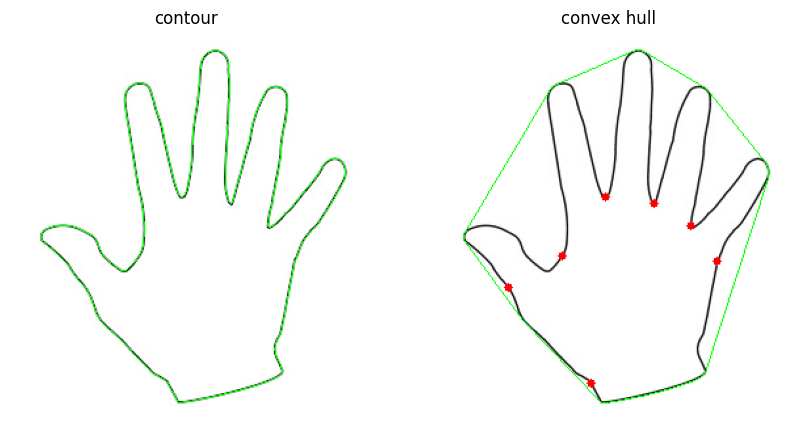

In [16]:
# cntr_convexhull.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/hand.jpg')
img2 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255,0), 1)

hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)

print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull)) 

hull2 = cv2.convexHull(cntr, returnPoints=False) # Find convex hull (by index)
defects = cv2.convexityDefects(cntr, hull2) # Finding convex hull defects

for i in range(defects.shape[0]):
    startP, endP, farthestP, distance = defects[i, 0] 
    farthest = tuple(cntr[farthestP][0]) 
    dist = distance/256.0   
    if dist > 1 :        
        cv2.circle(img2, farthest, 3, (0,0,255), -1) 

cv2.imshow('contour', img)
cv2.imshow('convex hull', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('contour')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('convex hull')
plt.show()

Even if the contour line is not convex, you can use the cv2.convexHull() function to make the contour line convex as shown above.  
컨투어 라인이 볼록하지 않는 경우도 cv2.convexHull() 함수를 사용해 위와같이 컨투어라인을 볼록하게 만들 수 있다.

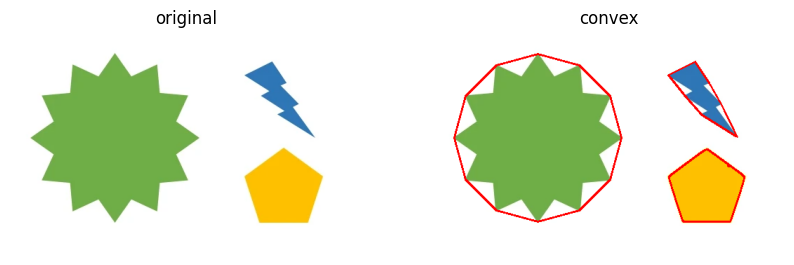

In [17]:
import cv2

src = cv2.imread("./images/practice_img/convex.webp")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    hull = cv2.convexHull(i, clockwise=True)
    cv2.drawContours(dst, [hull], 0, (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('convex')

plt.show()

## ▶ Contour Moment

Image moment refers to the feature value about the contour.  
이미지 모멘트는 컨투어에 관한 특징값을 뜻한다.   
공간 모멘트(spatial moments), 중심 모멘트(central moments), 정규화된 중심 모멘트(normalized central moments), 질량 중심(mass center) 등을 계산할 수 있습니다.  

When a contour point array is input, the moment of the corresponding contour is returned as a dictionary type.
A total of 24 moments are returned.

- 10 Spatial Moments,
- 7 Central moments,
- 7 Central Normalized Moments.

    컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환한다.   
    반환하는 모멘트는 총 24개로 
    - 10개의 위치 모멘트,   
    - 7개의 중심 모멘트,   
    - 7개의 정규화된 중심 모멘트

>- Spatial Moments : M00, M01, M02, M03, M10, M11, M12, M20, M21, M30  
>- Central Moments : Mu02, Mu03, Mu11, Mu12, Mu20, Mu21, Mu30
>- Central Normalized Moments : Nu02, Nu03, Nu11, Nu12, Nu20, Nu21, Nu30
    
code:  
>            for i in contours:  
>                M = cv2.moments(i, False)  
>                cX = int(M['m10'] / M['m00'])  
>                cY = int(M['m01'] / M['m00'])    
>
- Calculate moments from the contour using cv2.moments().
- stands for cv2.moments (array, binarized image).
- The array uses the structure or image returned from the contour detection function.
- Binarization Image determines whether to binarize the pixel values of the image when the input array parameter is an image.
- If you assign a True value to the binarization image parameter, all pixel values in the image that are not 0 are changed to a value of 1 to calculate the moment.
- Area, average, variance, etc. can be easily obtained through the moment function.

- The formula for finding the center point is as follows.   

    - cv2.moments()를 활용해 윤곽선에서 모멘트를 계산합니다.
    - cv2.moments(배열, 이진화 이미지)을 의미합니다.
    - 배열은 윤곽선 검출 함수에서 반환되는 구조 또는 이미지를 사용합니다.
    - 이진화 이미지는 입력된 배열 매개변수가 이미지일 경우, 이미지의 픽셀 값들을 이진화 처리할지 결정합니다.
    - 이진화 이미지 매개변수에 True 값을 할당한다면 이미지의 픽셀 값이 0이 아닌 값은 모두 1의 값으로 변경해 모멘트를 계산합니다.
    - 모멘트 함수를 통해 면적, 평균, 분산 등을 간단하게 구할 수 있습니다.  


- Formula for finding the center point 중심점을 구하는 공식  

$$ \bar{x} = \frac{m_{10}}{m_{00}},  \quad   \bar{y} = \frac{m_{01}}{m_{00}} $$

* 공간 모멘트(spatial moments)
 
$$ m_{ij} = {\Sigma}_{x,y}(array(x,y)* x^iy^j) $$

* 중심 모멘트(central moments)

$$ mu_{ij} = {\Sigma}_{x,y}(array(x,y)* (x-\bar{x})^i(y-\bar{y})^j) $$

* 정규화된 중심 모멘트(normalized central moments)
 
$$ nu_{ij} = \frac{mu_{ij}}{m_{00}^{\frac{i+j}{2} + 1}} $$ 

Moment Structure  
$$ M =
\begin{cases}
0th Moments:&   \mbox{$m_{00}$ } \\
1st Moments:&   \mbox{$m_{10}, \ m_{01}$ } \\
2nd Moments:&   \mbox{$m_{11}, \ m_{20}, \ m_{02}$ } \\
3rd Moments:&   \mbox{$mu_{11}, \ mu_{20}, \ mu_{02}$ } \\
2nd Central Moments:&   \mbox{$mu_{11}, \ mu_{20}, \ mu_{02}$ } \\
3rd Central Moments:&   \mbox{$mu_{21}, \ mu_{12}, \ mu_{30}, \ mu_{03}$ } \\
2nd Normalized Central moments:&   \mbox{$nu_{11}, \ nu_{20}, \ nu_{02}$ } \\
3rd Normalized Central moments:&   \mbox{$nu_{21}, \ nu_{12}, \ nu_{30}, \ nu_{03}$ } \\
\end{cases}$$

Non-returned value (always the same value) 반환되지 않는 값(항상 같은 값)   

\begin{cases}
mu_{00} = m_{00} \\
nu_{00} = 1 \\
mu_{01} = mu_{10} = nu_{01} = nu_{10} = 0 \\
\end{cases}


area:9870.00
area:12544.00
area:6216.00


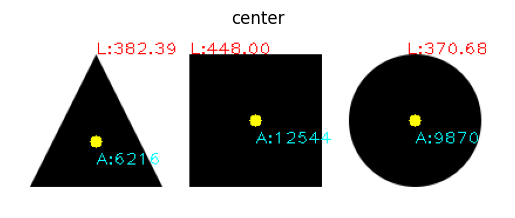

In [43]:
import cv2
import numpy as np

img = cv2.imread("./images/practice_img/shapes.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contour of each shape
for c in contours:
    mmt = cv2.moments(c)            # moments
    cx = int(mmt['m10']/mmt['m00']) # m10/m00, m01/m00  center point
    cy = int(mmt['m01']/mmt['m00'])
    a = mmt['m00']                  # area
    l = cv2.arcLength(c, True)     # Area outline length
    cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1) 
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20) , cv2.FONT_HERSHEY_PLAIN, 1, (255,255,0)) 
    cv2.putText(img, "L:%.2f"%l, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255)) 
    print("area:%.2f"%cv2.contourArea(c, False))   # contourArea

cv2.imshow('shapes (center:yellow spot)', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('center'), plt.axis('off')
plt.show()

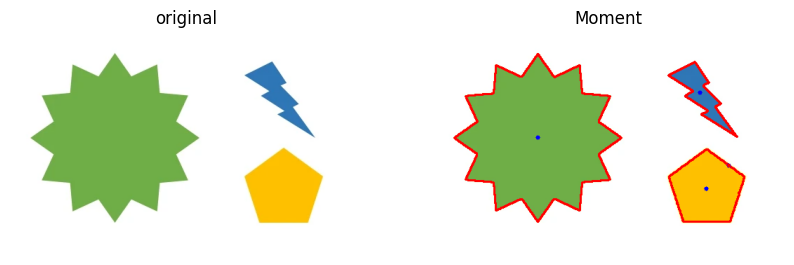

In [44]:
import cv2

src = cv2.imread("./images/practice_img/convex.webp")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    
    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Moment')

plt.show()

In [34]:
# contours[0]

In [26]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 7724.5,
 'm10': 3009260.0,
 'm01': 1727769.5,
 'm20': 1177116183.9166665,
 'm11': 673101994.2916666,
 'm02': 391324038.0833333,
 'm30': 462304065149.10004,
 'm21': 263297106472.03333,
 'm12': 152453409222.2,
 'm03': 89706316415.85,
 'mu20': 4788428.385564327,
 'mu11': 8894.988151788712,
 'mu02': 4866992.950282633,
 'mu30': -19208.483520507812,
 'mu21': -61654.27882170677,
 'mu12': -19714.445053577423,
 'mu03': 80210.3158569336,
 'nu20': 0.08025133053956138,
 'nu11': 0.00014907493165537884,
 'nu02': 0.08156802786574735,
 'nu30': -3.662833145881753e-06,
 'nu21': -1.1756749865884922e-05,
 'nu12': -3.759314092536907e-06,
 'nu03': 1.5295169098005612e-05}

■ Area of contour : m00 value or cv2.contourArea() 

In [28]:
cv2.contourArea(c0) # 7724.5

7724.5

■ arc Length : arcLength    
>- 2nd parameter closed : True - Construct a shape by connecting the start and end points of the contour and calculate the perimeter value.  
    컨투어의 시작점과 끝점을 이어 도형을 구성하고 둘레 값 계산   
    False - Calculate perimeter without connecting start and end points 시작점과 끝점을 잇지 않고 둘레 계산

In [29]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False) 

(357.11983811855316, 356.11983811855316)

■ Bounding fit Rectangle: boundingRect function

In [35]:
x0, y0 = zip(*np.squeeze(contours[0]))

In [36]:
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h 

(336, 167, 108, 104)

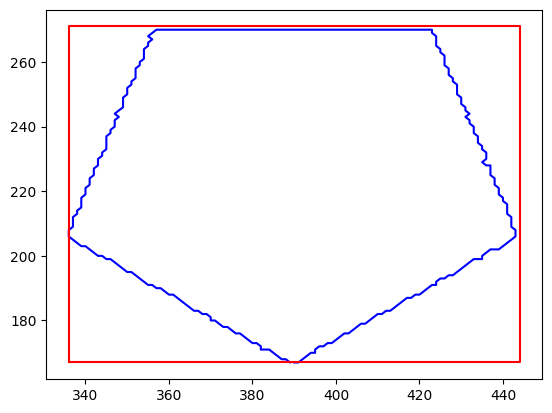

In [37]:
plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

In [38]:
# aspect_ratio 가로 세로 비율
aspect_ratio = float(w) / h
aspect_ratio # 0.7063492063492064

1.0384615384615385

■ Extream Point (컨투어 라인의 중심점과 좌우상하의 끝점)

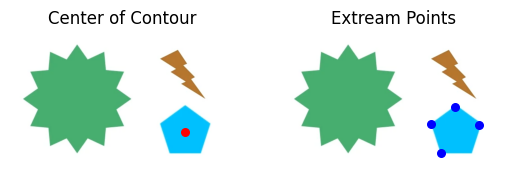

In [41]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1),plt.imshow(src, cmap='bone'),plt.title("Center of Contour"),plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2),plt.imshow(src, cmap='bone'),plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

## ▶ Convexity Defects  

Any deviation of the object from convex hull can be considered as convexity defect.  
OpenCV comes with a ready-made function to find this, cv.convexityDefects(). A basic function call would look like below:    
    
* **defects = cv2.convexityDefects(contour, convexhull):** Finding convex hull defects 볼록 선체 결함 찾기
>- contour: input contour 입력 컨투어
>- convexhull: Index corresponding to the convex hull 볼록 선체에 해당하는 컨투어의 인덱스
>- defects: Array index of contour with convex hull defects 볼록 선체 결함이 있는 컨투어의 배열 인덱스, N x 1 x 4 배열, [starts, end, farthest, distance]
>>- start: Index of the contour where the concave angle begins 오목한 각이 시작되는 컨투어의 인덱스
>>- end: Index of the contour where the concave angle ends오목한 각이 끝나는 컨투어의 인덱스
>>- farthest: Contour index of the concave point farthest from the convex hull 볼록 선체에서 가장 먼 오목한 지점의 컨투어 인덱스
>>- distance: Distance from farthest to convex hull farthest와 볼록 선체와의 거리

32.01562118716424 -21.470910553583888


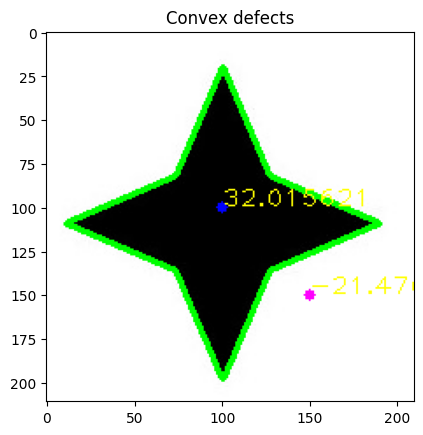

In [47]:
import cv2
import numpy as py

file_name = './images/practice_img/4star.jpg'
img = cv2.imread(file_name)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour = contours[0]
cv2.drawContours(img, [contour], 0, (0,255,0),2)

p1 = (100,100)
p2 = (150,150)
cv2.circle(img, p1, 3, (255,0,0), -1)
cv2.circle(img, p2, 3, (255,0,255), -1)

dist1 = cv2.pointPolygonTest(contour, p1, True)
dist2 = cv2.pointPolygonTest(contour, p2, True)
print(dist1, dist2)
cv2.putText(img, '%f'%dist1, p1, cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
cv2.putText(img, '%f'%dist2, p2, cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

cv2.imshow('Convex defects', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Convex defects')
plt.show()

## ▶ Match Shape (컨투어와 도형 매칭)  

Comparing the contours of different objects can help you see how similar they are. This can be simply implemented with the function below.  
서로 다른 물체의 컨투어를 비교하면 두 물체가 얼마나 비슷한지 알 수 있습니다. 이는 아래 함수로 간단히 구현할 수 있습니다.

* **retval = cv2.matchShapes(contour1, contour2, method, parameter):** Matching shapes with two contours 두 개의 컨투어로 도형 매칭
>- contour1, contour2: Two contours to compare 비교할 두 개의 컨투어
>- method: Hue moment comparison algorithm selection 휴 모멘트 비교 알고리즘 선택 flag (cv2.CONTOURS_MATCH_I1, cv2.CONTOURS_MATCH_I2, cv2.CONTOURS_MATCH_I3)
>- parameter: Set to 0 as a preliminary argument to pass to the algorithm. 알고리즘에 전달을 위한 예비 인수로 0으로 고정
>- retval: Degree of similarity between two shapes 두 도형의 닮은 정도 (0 is the Same, the bigger the number, the bigger the different 0=동일, 숫자가 클수록 다름)

### ●  contour_matchShape  

OpenCV comes with a function **cv.matchShapes()** which enables us to compare two shapes, or two contours and returns a metric showing the similarity.   
**The lower the result, the better match it is.** It is calculated based on the hu-moment values.  

hu-moment : https://cvexplained.wordpress.com/2020/07/21/10-4-hu-moments/

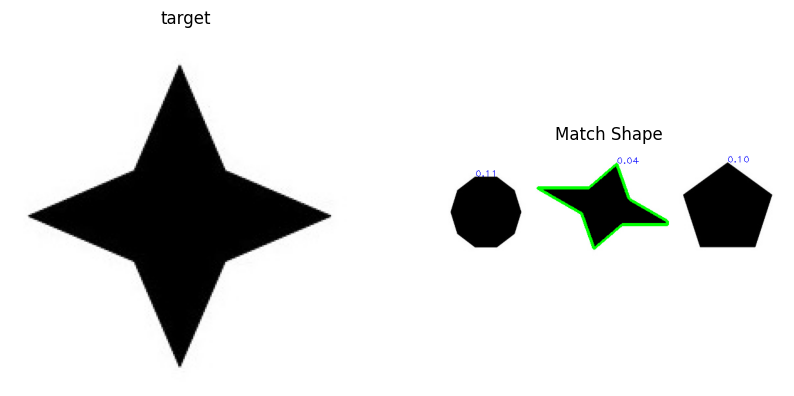

In [48]:
# contr_matchShape.py
import cv2
import numpy as np

target = cv2.imread('./images/practice_img/4star.jpg') 
shapes = cv2.imread('./images/practice_img/shapestomatch.jpg') 

targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)

ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV) 

cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

matchs = [] 
for contr in cntrs_shapes:
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0) # Match the target shape with one of several shapes.
    matchs.append( (match, contr)) # Save the matching score and contour of the shape as a pair
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]), cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 ) # The matching score is displayed at the starting point of the contour of the shape.  
    
matchs.sort(key=lambda x : x[0]) # Sort by matching score

cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3) # Draw a line on the contour of the shape that gets the lowest matching points
cv2.imshow('target', target)
cv2.imshow('Match Shape', shapes)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(target), axs[0].axis('off'), axs[0].set_title('target')
axs[1].imshow(shapes), axs[1].axis('off'), axs[1].set_title('Match Shape')
plt.show()

## 👉 Contour More (Hierarchy)

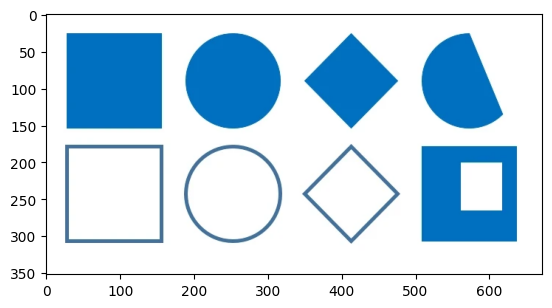

In [3]:
# contours https://076923.github.io/posts/Python-opencv-21/
import cv2
import numpy as py
from matplotlib import pyplot as plt

src = cv2.imread("./images/practice_img/contour_pic1.webp", cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print(i, hierarchy[0][i])
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()

0 [ 2 -1  1 -1]
1 [-1 -1 -1  0]
2 [ 4  0  3 -1]
3 [-1 -1 -1  2]
4 [ 7  2  5 -1]
5 [ 6 -1 -1  4]
6 [-1  5 -1  4]
7 [ 9  4  8 -1]
8 [-1 -1 -1  7]
9 [16  7 10 -1]
10 [11 -1 -1  9]
11 [12 10 -1  9]
12 [13 11 -1  9]
13 [14 12 -1  9]
14 [15 13 -1  9]
15 [-1 14 -1  9]
16 [21  9 17 -1]
17 [18 -1 -1 16]
18 [19 17 -1 16]
19 [20 18 -1 16]
20 [-1 19 -1 16]
21 [28 16 22 -1]
22 [23 -1 -1 21]
23 [24 22 -1 21]
24 [25 23 -1 21]
25 [26 24 -1 21]
26 [27 25 -1 21]
27 [-1 26 -1 21]
28 [-1 21 -1 -1]


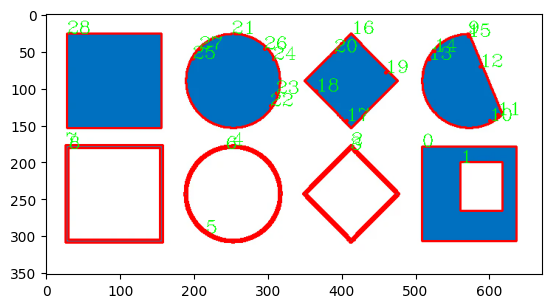

In [5]:
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))
plt.show()

## ➡️ Hierarchy Structure 계층 구조  

The hierarchy is a matrix of size (number of contours x 4) consisting of values 1, 0, and -1.
- Element 1: Index of the next contour at the same level. -1 if there is no next contour of the same level
- Element 2: Index of the previous contour at the same level. -1 if there is no previous contour at the same level
- Element 3: Index of lower child contour. Lowest contour plane -1
- Element 4: Index of the parent contour. Top contour plane -1
    
        상하구조(hierarchy)는 1, 0, -1 값으로 이루어진 (컨투어 수 x 4) 크기의 행렬이다.
        - 1번 원소: 같은 수준의 다음 컨투어의 인덱스. 같은 수준의 다음 컨투어가 없으면 -1
        - 2번 원소: 같은 수준의 이전 컨투어의 인덱스. 같은 수준의 이전 컨투어가 없으면 -1
        - 3번 원소: 하위 자식 컨투어의 인덱스. 가장 하위의 컨투어면 -1
        - 4번 원소: 부모 컨투어의 인덱스. 가장 상위의 컨투어면 -1  
            
The hierarchy indicates whether the relationship contains an outline or not. That is, we can distinguish between outer contours, inner contours, and the same hierarchy.
This information is contained in a hierarchy. When outputting hierarchy, the following results are returned.  

계층 구조는 윤곽선을 포함 관계의 여부를 나타냅니다. 즉, 외곽 윤곽선, 내곽 윤곽선, 같은 계층 구조를 구별할 수 있습니다.
이 정보는 hierarchy에 담겨있습니다. hierarchy를 출력할 경우 다음과 같은 결과를 반환합니다.  

- The first hierarchy has the values [ 2 -1 1 -1]. Contains index information for [next contour, previous contour, inner contour, outer contour].
- The next contour of the contour at index 0 means the contour at index 2 and the previous contour does not exist.
- The inner contour means that the contour corresponding to index 1 is set as the child contour. That is, the contour at index 1 is contained inside the contour at index 0.
- The outer contour has a value of -1, so there is no outer contour.
- If the information of the next contour and the previous contour do not have a value of -1, they are contours of the same level.  

        - 첫 번째 계층 구조는 [ 2 -1 1 -1]의 값을 갖습니다. [다음 윤곽선, 이전 윤곽선, 내곽 윤곽선, 외곽 윤곽선]에 대한 인덱스 정보를 포함하고 있습니다.  
        - 인덱스 0의 윤곽선의 다음 윤곽선은 인덱스 2의 윤곽선을 의미하며 이전 윤곽선은 존재하지 않다는 것을 의미합니다.  
        - 내곽 윤곽선은 인덱스 1에 해당하는 윤곽선을 자식 윤곽선으로 두고 있다는 의미입니다. 즉, 인덱스 0 윤곽선 내부에 인덱스 1의 윤곽선이 포함되어 있습니다.  
        - 외곽 윤곽선은 -1의 값을 갖고 있으므로 외곽 윤곽선은 존재하지 않습니다.  
        - 다음 윤곽선과 이전 윤곽선의 정보가 -1의 값이 아니라면 서로 동등한 계층의 윤곽선입니다.

- The outline in the same layer as the outline at index 0 is the outline at index 2.
- The outline of index 0 has the outline of index 1 as its internal outline.
- The contour at index 1 has no contour in the same layer, so the value of the next and previous contours is -1.
- The contour at index 1 does not have an inner contour and only an outer contour exists, so the contour at index 0 is returned as the outer contour.  

        - 0번 인덱스의 윤곽선과 동등한 계층에 있는 윤곽선은 2번 인덱스의 윤곽선입니다.
        - 0번 인덱스의 윤곽선은 1번 인덱스의 윤곽선을 내부 윤곽선으로 갖고 있습니다.
        - 1번 인덱스의 윤곽선은 동등한 계층에 있는 윤곽선이 없으므로 다음 윤곽선과 이전 윤곽선의 값이 -1입니다.
        - 1번 인덱스의 윤곽선은 내곽 윤곽선이 없으며, 외곽 윤곽선만 존재하여 0번 인덱스의 윤곽선을 외곽 윤곽선으로 반환합니다.

The main element in detecting outlines (contours) is detecting white objects.
Therefore, the background is black and the object to be detected is transformed to appear white.
After binarization, it is inverted and the object to be detected is converted to white.  

    윤곽선(컨투어)를 검출하는 주된 요소는 하얀색의 객체를 검출합니다.  
    그러므로 배경은 검은색이며 검출하려는 물체는 하얀색의 성질을 띄게끔 변형합니다.  
    이진화 처리 후, 반전시켜 검출하려는 물체를 하얀색의 성질을 띄도록 변환합니다.  
    
- Search for outlines (contours) in a binarized image using cv2.findContours().
- stands for cv2.findContours(binarized image, search method, approximation method).
- Returns the outline and hierarchy as return values.
- The contour contains the points of the detected contour as an array of Numpy structures.
- Hierarchy refers to the hierarchy of outlines. It contains attribute information corresponding to each outline.
- Uses a loop to draw detected contours and displays the hierarchical structure of those contours.
    
    - cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색합니다.  
    - cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미합니다.  
    - 반환값으로 윤곽선, 계층 구조를 반환합니다.  
    - 윤곽선은 Numpy 구조의 배열로 검출된 윤곽선의 지점들이 담겨있습니다.  
    - 계층 구조는 윤곽선의 계층 구조를 의미합니다. 각 윤곽선에 해당하는 속성 정보들이 담겨있습니다.  
    - 반복문을 사용하여 검출된 윤곽선을 그리며 해당 윤곽선의 계층 구조를 표시합니다.  
    
Draw the detected contour using cv2.drawContours().
stands for cv2.drawContours(image, [contour], contour index, (B, G, R), thickness, line type).
    
    cv2.drawContours()을 이용하여 검출된 윤곽선을 그립니다.  
    cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)을 의미합니다.  

- Contour is a Numpy array where detected contours are stored.
- Contour index refers to what index index to draw the outline in the detected outline array.
- If the outline index is set to 0, the outline at the 0th index will be drawn. However, if you re-enclose the outline argument in square brackets, it changes to an array with the 0th index as the maximum value.
- In the same way [Contour], 0 and Contour, -1 have the same meaning. (-1 means all contour arrays)  

    - 윤곽선은 검출된 윤곽선들이 저장된 Numpy 배열입니다.  
    - 윤곽선 인덱스는 검출된 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미합니다.  
    - 윤곽선 인덱스를 0으로 사용할 경우 0 번째 인덱스의 윤곽선을 그리게 됩니다. 하지만, 윤곽선 인수를 대괄호로 다시 묶을 경우, 0 번째 인덱스가 최댓값인 배열로 변경됩니다.  
    - 동일한 방식으로 [윤곽선], 0과 윤곽선, -1은 동일한 의미를 갖습니다. (-1은 윤곽선 배열 모두를 의미)  

## ▶ Approx Poly (다각형 근사)

It is used to compress the outline points of a video or image and approximate them as polygons.
Approximate polygons of outlines can be detected in videos or images.  

영상이나 이미지의 윤곽점을 압축해 다각형으로 근사하기 위해 사용합니다.  
영상이나 이미지에서 윤곽선의 근사 다각형을 검출할 수 있습니다.

In [13]:
import cv2

src = cv2.imread("./images/practice_img/poly.webp", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
binary = cv2.bitwise_not(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

for contour in contours:
    epsilon = cv2.arcLength(contour, True) * 0.02
    approx_poly = cv2.approxPolyDP(contour, epsilon, True)

    for approx in approx_poly:
        cv2.circle(src, tuple(approx[0]), 3, (255, 0, 0), -1)
cv2.namedWindow('Poly', cv2.WINDOW_NORMAL)           
cv2.imshow("Poly", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

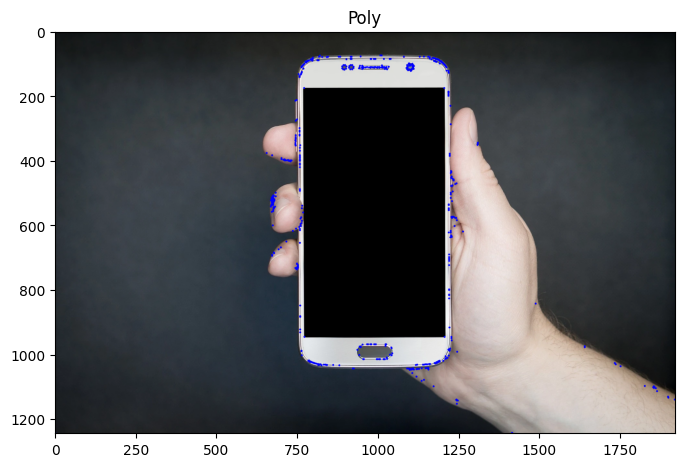

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('Poly')
plt.show()

Use a loop to iterate through index values ​​and subcontour information.
To calculate the approximate accuracy, we use 2% of the total length of the contour.
To calculate the total length of the contour, use cv2.arcLength() to calculate the total length of the detected contour.  

    반복문을 사용하여 색인값과 하위 윤곽선 정보로 반복합니다.  
    근사치 정확도를 계산하기 위해 윤곽선 전체 길이의 2%로 활용합니다  
    윤곽선의 전체 길이를 계산하기 위해 cv2.arcLength()을 이용해 검출된 윤곽선의 전체 길이를 계산합니다.  
    
- stands for cv2.arcLength (contour, closed curve).
- Contour is a Numpy array where detected contours are stored.
- Closed curve sets whether the detected contour is closed or open.    

    - cv2.arcLength(윤곽선, 폐곡선)을 의미합니다.  
    - 윤곽선은 검출된 윤곽선들이 저장된 Numpy 배열입니다.  
    - 폐곡선은 검출된 윤곽선이 닫혀있는지, 열려있는지 설정합니다.  

➡️ If you use Closed Curve as True, the contour will be closed and the final length will be longer. (meaning whether the endpoint is connected or not)  
        폐곡선을 True로 사용할 경우, 윤곽선이 닫혀 최종 길이가 더 길어집니다. (끝점 연결 여부를 의미)  
  
**approx_poly = cv2.approxPolyDP(contour, epsilon, True)**

- Using cv2.approxPolyDP(), the contour points are approximated and returned as an approximate polygon.
- stands for cv2.approxPolyDP(contour, approximation accuracy, closed curve).
- Contour is a Numpy array where detected contours are stored.
- Approximation accuracy refers to the maximum deviation gap between the input polygon (contour) and the approximated polygon that will be returned.
- Closed curve sets whether the detected contour is closed or open.

    - cv2.approxPolyDP()를 활용해 윤곽선들의 윤곽점들로 근사해 근사 다각형으로 반환합니다.  
    - cv2.approxPolyDP(윤곽선, 근사치 정확도, 폐곡선)을 의미합니다.  
    - 윤곽선은 검출된 윤곽선들이 저장된 Numpy 배열입니다.  
    - 근사치 정확도는 입력된 다각형(윤곽선)과 반환될 근사화된 다각형 사이의 최대 편차 간격을 의미합니다.  
    - 폐곡선은 검출된 윤곽선이 닫혀있는지, 열려있는지 설정합니다.  

➡️ The lower the value of approximation accuracy, the closer the approximation is to the original contour.  
        근사치 정확도의 값이 낮을 수록, 근사를 더 적게해 원본 윤곽과 유사해집니다.  
    
            for approx in approx_poly:  
                cv2.circle(src, tuple(approx[0]), 3, (255, 0, 0), -1)  
                
Again, the approximate polygon is repeated through a loop and the approximate points are displayed for the image.
The information of the approximate polygon is the same as the arrangement of the contour.  

            다시 반복문을 통해 근사 다각형을 반복해 근사점을 이미지 위해 표시합니다.  
            근사 다각형의 정보는 윤곽선의 배열 형태와 동일합니다.  

Polygonal approximation uses the Douglas-Peucker algorithm.
- Decimate contours composed of line segments into identical or similar contours with fewer contour points using repetition and end points.
- The Douglas-Packer algorithm approximates a polygon by considering the maximum deviation between the existing polygon and the polygon with compressed outline points as the value of approximation accuracy (epsilon).

➡️ Decimate means resampling data sampled at a certain interval with a larger sampling interval than the original interval.

    다각형 근사는 더글라스-패커(Douglas-Peucker) 알고리즘을 사용합니다.
    - 반복과 끝점을 이용해 선분으로 구성된 윤곽선들을 더 적은 수의 윤곽점으로 동일하거나 비슷한 윤곽선으로 데시메이트(decimate)합니다.
    - 더글라스-패커 알고리즘은 근사치 정확도(epsilon)의 값으로 기존의 다각형과 윤곽점이 압축된 다각형의 최대 편차를 고려해 다각형을 근사하게 됩니다.

    ➡️ 데시메이트란 일정 간격으로 샘플링된 데이터를 기존 간격보다 더 큰 샘플링 간격으로 다시 샘플링하는 것을 의미합니다.